### 1. Data Import and Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv("./dataset/test.csv")
train = pd.read_csv("./dataset/train.csv")

### 2. Exploratory Data Analysis

* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [3]:
train.shape
test.shape

(2933, 19)

In [4]:
test.shape

(2933, 19)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [6]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [7]:
test.isnull().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [8]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


<AxesSubplot:xlabel='ProductPitched', ylabel='Age'>

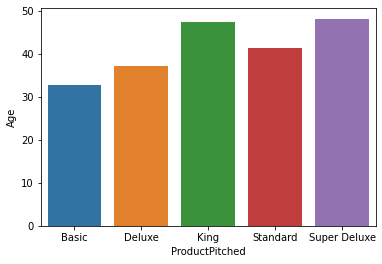

In [9]:
sb.barplot(x="ProductPitched", y="Age", ci=None, data=train)

In [10]:
train["TypeofContact"].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='DurationOfPitch'>

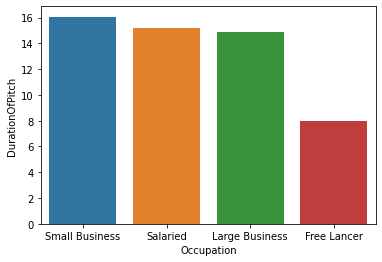

In [11]:
sb.barplot(x="Occupation", y="DurationOfPitch", ci=None, data=train)

In [12]:
train["NumberOfFollowups"].mean()
# 평균치 = 4

3.718331616889804

In [13]:
train["NumberOfFollowups"].value_counts()

4.0    831
3.0    571
5.0    330
2.0     89
1.0     74
6.0     47
Name: NumberOfFollowups, dtype: int64

<AxesSubplot:xlabel='CityTier', ylabel='PreferredPropertyStar'>

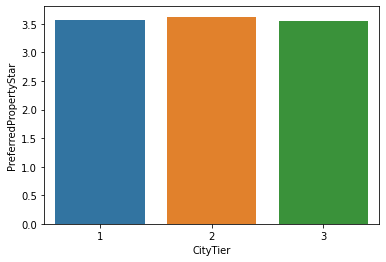

In [14]:
sb.barplot(x="CityTier", y="PreferredPropertyStar", ci=None, data=train)

In [15]:
train["PreferredPropertyStar"].value_counts()

3.0    1212
5.0     373
4.0     360
Name: PreferredPropertyStar, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='NumberOfTrips'>

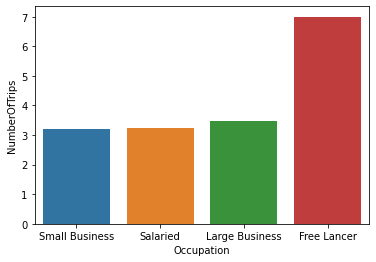

In [16]:
sb.barplot(x="Occupation", y="NumberOfTrips", ci=None, data=train)

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='NumberOfChildrenVisiting'>

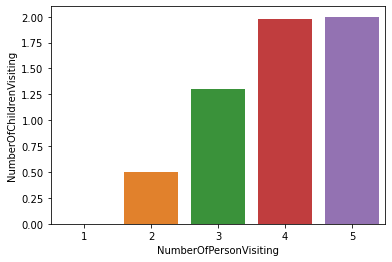

In [17]:
sb.barplot(x="NumberOfPersonVisiting", y="NumberOfChildrenVisiting", ci=None, data=train)

In [18]:
train[train["NumberOfPersonVisiting"] == 3]["NumberOfChildrenVisiting"].value_counts()

2.0    428
1.0    406
0.0    137
Name: NumberOfChildrenVisiting, dtype: int64

<AxesSubplot:xlabel='Designation', ylabel='MonthlyIncome'>

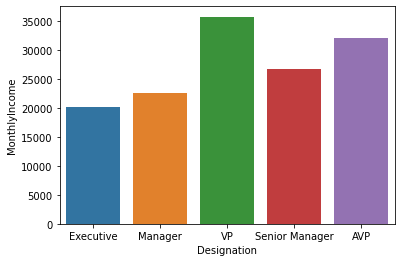

In [19]:
sb.barplot(x="Designation", y="MonthlyIncome", ci=None, data=train)

### 3. Data Processing

* fill NaN Value

In [20]:
# Age
train["Age"].fillna(train.groupby("ProductPitched")["Age"].transform("mean"), inplace=True)

#TypeofContact
train["TypeofContact"].fillna(train["TypeofContact"].mode()[0], inplace=True)
test["TypeofContact"].fillna(train["TypeofContact"].mode()[0], inplace=True)

# DurationOfPitch
train["DurationOfPitch"].fillna(train.groupby("Occupation")["DurationOfPitch"].transform("mean"), inplace=True)

# NumberOfFollowups
train["NumberOfFollowups"].fillna(4, inplace=True)
test["NumberOfFollowups"].fillna(4, inplace=True)

#PreferredPropertyStar
train["PreferredPropertyStar"].fillna(train["PreferredPropertyStar"].mode()[0], inplace=True)
test["PreferredPropertyStar"].fillna(train["PreferredPropertyStar"].mode()[0], inplace=True)

# NumberOfTrips
train["NumberOfTrips"].fillna(train.groupby("Occupation")["NumberOfTrips"].transform("mean").astype("int64"), inplace=True)

# NumberOfChildrenVisiting
train["NumberOfChildrenVisiting"].fillna(train.groupby("NumberOfPersonVisiting")["NumberOfChildrenVisiting"].transform("mean").astype("int64"), inplace=True)

# MonthlyIncome
train["MonthlyIncome"].fillna(train.groupby("Designation")["MonthlyIncome"].transform("mean"), inplace=True)

for idx in range(len(test)):
    if np.isnan(test["Age"][idx]):
        test["Age"][idx] = train[train["ProductPitched"] == test["ProductPitched"][idx]]["Age"].mean()
    if np.isnan(test["DurationOfPitch"][idx]):
        test["DurationOfPitch"][idx] = train[train["Occupation"] == test["Occupation"][idx]]["DurationOfPitch"].mean()
    if np.isnan(test["NumberOfTrips"][idx]):
        test["NumberOfTrips"][idx] = train[train["Occupation"] == test["Occupation"][idx]]["NumberOfTrips"].mean().astype("int64")
    if np.isnan(test["NumberOfChildrenVisiting"][idx]):
        test["NumberOfChildrenVisiting"][idx] = train[train["NumberOfPersonVisiting"] == test["NumberOfPersonVisiting"][idx]]["NumberOfChildrenVisiting"].mean().astype("int64")
    if np.isnan(test["MonthlyIncome"][idx]):
        test["MonthlyIncome"][idx] = train[train["Designation"] == test["Designation"][idx]]["MonthlyIncome"].mean()

In [21]:
train.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [22]:
test.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [23]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.000000,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.000000,0
1,2,34.0,Self Enquiry,3,16.072445,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.000000,1
2,3,45.0,Company Invited,1,15.183983,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,22614.373397,0
3,4,29.0,Company Invited,1,7.000000,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.000000,1
4,5,42.0,Self Enquiry,3,6.000000,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.000000,0


In [24]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,978.000000,37.331475,1.641432,15.529053,2.922762,3.720205,3.565729,3.248082,0.291049,3.067519,0.619437,1.206650,23527.628448,0.195908
std,564.504207,8.999316,0.908744,7.935264,0.712276,1.001011,0.792204,1.788551,0.454362,1.372915,0.485649,0.856821,5516.575937,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20358.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22412.000000,0.000000
75%,1466.500000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25401.500000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [25]:
def age_grouping(data):
    data.loc[data["Age"] <= 31, "Age"] = 0
    data.loc[(data["Age"] > 31) & (data["Age"] <= 36), "Age"] = 1
    data.loc[(data["Age"] > 36) & (data["Age"] <= 43), "Age"] = 2
    data.loc[data["Age"] > 43, "Age"] = 3
    data["Age"] = data["Age"].astype("int64")

In [26]:
age_grouping(train)
age_grouping(test)

In [27]:
train["TypeofContact"].value_counts()

Self Enquiry       1389
Company Invited     566
Name: TypeofContact, dtype: int64

In [28]:
contact_dict = {"Self Enquiry" :0, "Company Invited": 1}
train["TypeofContact"] = train["TypeofContact"].map(contact_dict)
test["TypeofContact"] = test["TypeofContact"].map(contact_dict)

In [29]:
def duration_pitch(data):
    data.loc[data["DurationOfPitch"] <= 9, "DurationOfPitch"] = 0
    data.loc[(data["DurationOfPitch"] > 9) & (data["DurationOfPitch"] <=14), "DurationOfPitch"] = 1
    data.loc[(data["DurationOfPitch"] > 14) & (data["DurationOfPitch"] <= 19), "DurationOfPitch"] = 2
    data.loc[data["DurationOfPitch"] > 19,"DurationOfPitch"] = 3
    data["DurationOfPitch"] = data["DurationOfPitch"].astype("int64")

In [30]:
duration_pitch(train)
duration_pitch(test)

In [31]:
occ_dict = {"Salaried":0, "Small Business":1, "Large Business":2, "Free Lancer":3}
train["Occupation"] = train["Occupation"].map(occ_dict)
test["Occupation"] = test["Occupation"].map(occ_dict)

In [32]:
gender_dict = {"Male":0, "Female":1, "Fe Male":2}
train["Gender"] = train["Gender"].map(gender_dict)
test["Gender"] = test["Gender"].map(gender_dict)

In [33]:
train["NumberOfFollowups"] = train["NumberOfFollowups"].astype("int64")
test["NumberOfFollowups"] = test["NumberOfFollowups"].astype("int64")
train["PreferredPropertyStar"] = train["PreferredPropertyStar"].astype("int64")
test["PreferredPropertyStar"] = test["PreferredPropertyStar"].astype("int64")
train["NumberOfChildrenVisiting"] = train["NumberOfChildrenVisiting"].astype("int64")
test["NumberOfChildrenVisiting"] = test["NumberOfChildrenVisiting"].astype("int64")

In [34]:
product_dict = {"Basic":0, "Deluxe":1, "Standard":2, "Super Deluxe":3, "King":4}
train["ProductPitched"] = train["ProductPitched"].map(product_dict)
test["ProductPitched"] = test["ProductPitched"].map(product_dict)

In [35]:
train["NumberOfTrips"] = train["NumberOfTrips"].astype("int64")
test["NumberOfTrips"] = test["NumberOfTrips"].astype("int64")

In [36]:
marry_dict = {"Married":0, "Divorced":1, "Single":2, "Unmarried":3}
train["MaritalStatus"] = train["MaritalStatus"].map(marry_dict)
test["MaritalStatus"] = test["MaritalStatus"].map(marry_dict)

In [37]:
des_dict = {"Executive":0, "Manager":1, "Senior Manager":2, "AVP":3, "VP":4}
train["Designation"] = train["Designation"].map(des_dict)
test["Designation"] = test["Designation"].map(des_dict)

In [38]:
def income_group(data):
    data.loc[data["MonthlyIncome"] <= 20358, "MonthlyIncome"] = 0
    data.loc[(data["MonthlyIncome"] > 20358) & (data["MonthlyIncome"] <= 22412), "MonthlyIncome"] = 1
    data.loc[(data["MonthlyIncome"] > 22412) & (data["MonthlyIncome"] <= 25401.5), "MonthlyIncome"] = 2
    data.loc[data["MonthlyIncome"] >= 25401.5, "MonthlyIncome"] = 3
    data["MonthlyIncome"] = data["MonthlyIncome"].astype("int64")

In [39]:
income_group(train)
income_group(test)

In [40]:
train.drop("id", axis=1, inplace=True)

### 4. Training

In [41]:
# Classification module
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:
test.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,1,1,3,2,1,0,2,5,1,3,0,1,0,2,0,1,1,0
1,2,3,0,2,1,1,0,3,4,1,4,0,1,1,5,0,1,1,0
2,3,2,0,3,3,1,0,3,4,1,3,0,5,0,5,1,0,1,1
3,4,2,0,1,3,1,0,3,6,1,3,3,6,0,3,1,2,1,2
4,5,0,0,3,0,2,1,4,4,0,4,3,3,1,4,1,3,0,1


In [43]:
# Data
y_train = train["ProdTaken"]
x_train = train.drop("ProdTaken", axis=1)
test_pred = test.copy()
test_pred = test_pred.drop("id", axis=1)

In [44]:
# using K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [45]:
print("---- Logistic Regression ----")
logis_k = LogisticRegression()
logis_k_score = cross_val_score(logis_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(logis_k_score)
print(f"Average logis_k score: {np.mean(logis_k_score)} \n")

print("---- Support Vector Machine ----")
svm_k = SVC()
svm_k_score = cross_val_score(svm_k, x_train, y_train, cv=kfold, n_jobs=1, scoring='accuracy')
print(svm_k_score)
print(f"Average svm_k score: {np.mean(svm_k_score)} \n")

print("---- K-Nerest Neighbor ----")
knn_k = KNeighborsClassifier(n_neighbors=5)
knn_k_score = cross_val_score(knn_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(knn_k_score)
print(f"Average knn_k score: {np.mean(knn_k_score)} \n")

print("---- Decision Tree ----")
tree_k = DecisionTreeClassifier()
tree_k_score = cross_val_score(tree_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(tree_k_score)
print(f"Average tree_k score: {np.mean(tree_k_score)} \n")

print("---- Random Forest ----")
forest_k = RandomForestClassifier()
forest_k_score = cross_val_score(forest_k, x_train, y_train, cv=kfold, n_jobs=1, scoring="accuracy")
print(forest_k_score)
print(f"Average forest_k score: {np.mean(forest_k_score)} \n")

---- Logistic Regression ----
[0.81585678 0.85421995 0.83887468 0.83375959 0.85677749]
Average logis_k score: 0.8398976982097187 

---- Support Vector Machine ----
[0.79028133 0.83887468 0.83631714 0.84910486 0.84143223]
Average svm_k score: 0.8312020460358056 

---- K-Nerest Neighbor ----
[0.82097187 0.83375959 0.84143223 0.84398977 0.84143223]
Average knn_k score: 0.8363171355498722 

---- Decision Tree ----
[0.82608696 0.85933504 0.81841432 0.79795396 0.80051151]
Average tree_k score: 0.8204603580562659 

---- Random Forest ----
[0.86700767 0.8797954  0.87723785 0.8797954  0.88491049]
Average forest_k score: 0.8777493606138108 



In [48]:
forest_final = RandomForestClassifier()
forest_final.fit(x_train, y_train)
y_pred = forest_final.predict(test_pred)
submission = pd.DataFrame({"id" : test["id"], "ProdTaken":y_pred})
submission.to_csv("submission.csv", index=False)